# Bikeshare submission

---

## Imports

In [122]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

## Define the business goal

Build a model that is able to predict the number of bikes rented tomorrow at 2 pm.

## Get data

In [123]:
train = './data/train.csv'
df = pd.read_csv(train, parse_dates=True, index_col=0)

## Explopratory Data Analysis

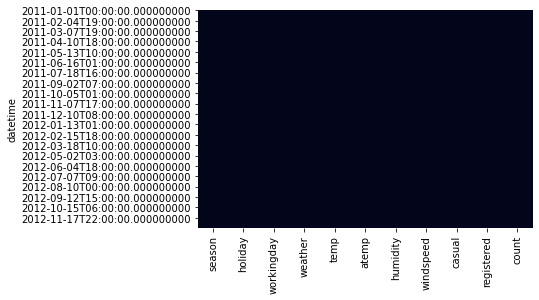

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.heatmap(df.isna(), cbar=False)


In [125]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


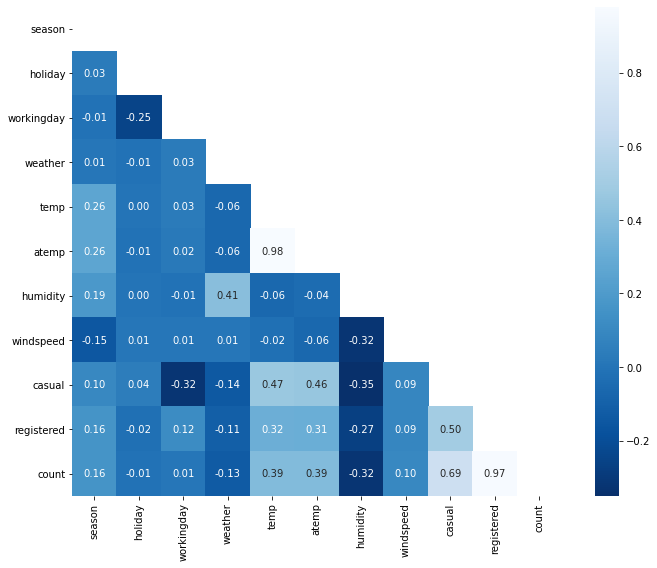

In [126]:
# the correlation
plt.rcParams['figure.figsize'] = (12,9)

sns.heatmap(round(df.corr(), 2), annot=True,fmt = '.2f',
            square = True,
            cmap = "Blues_r", 
            mask = np.triu(df.corr()))

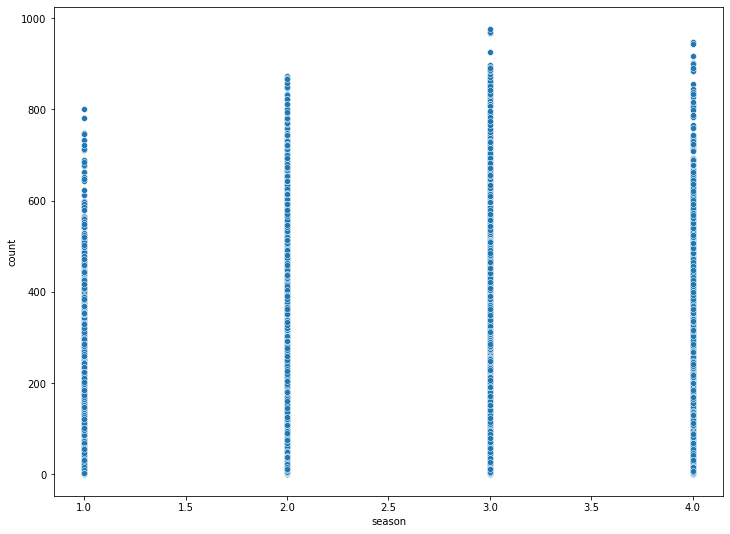

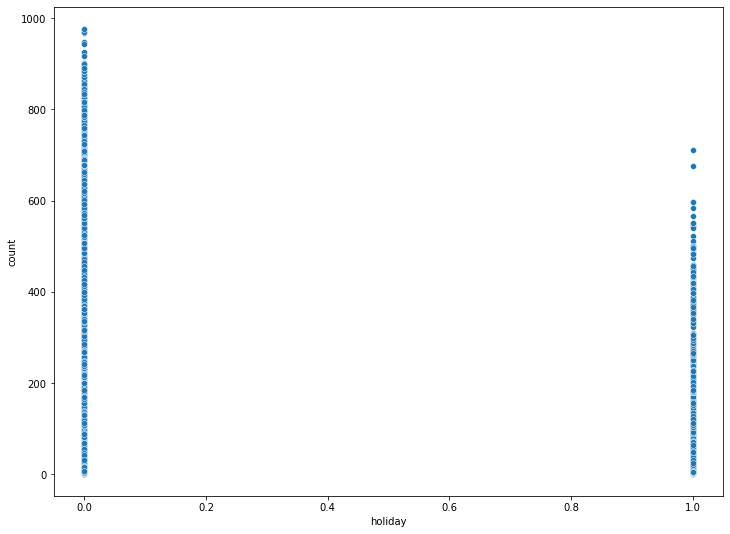

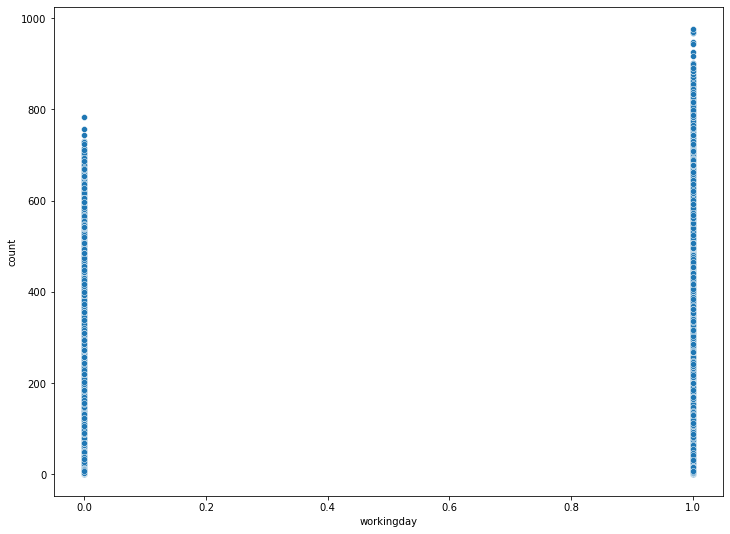

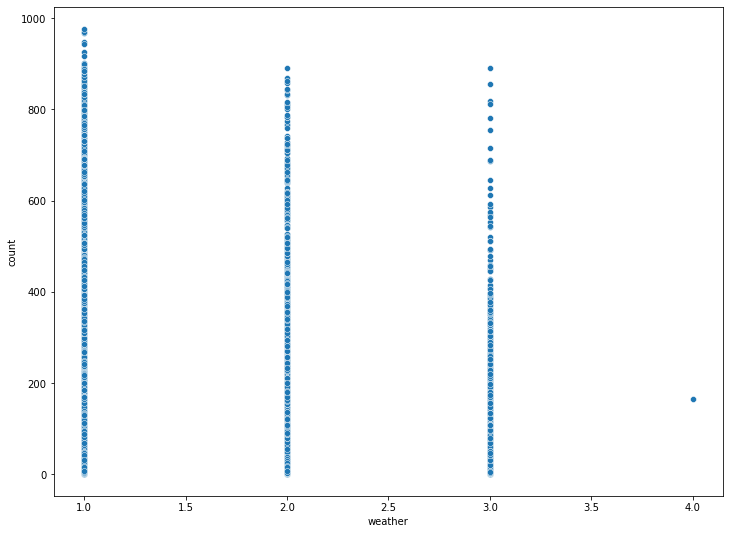

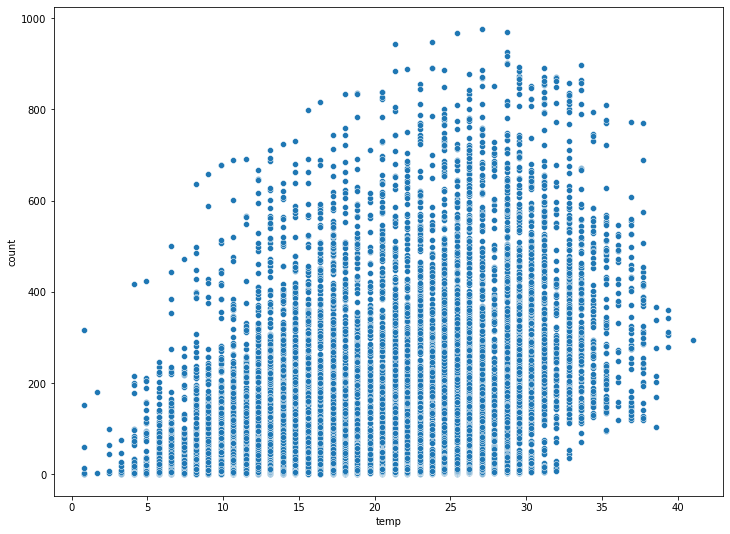

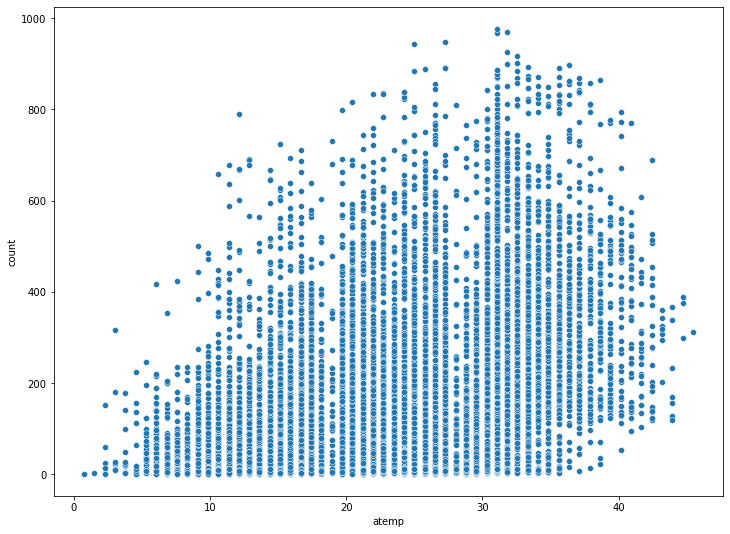

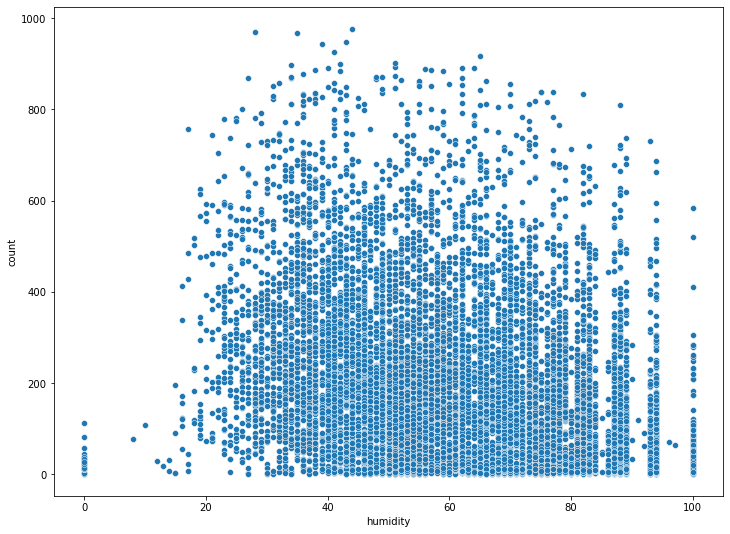

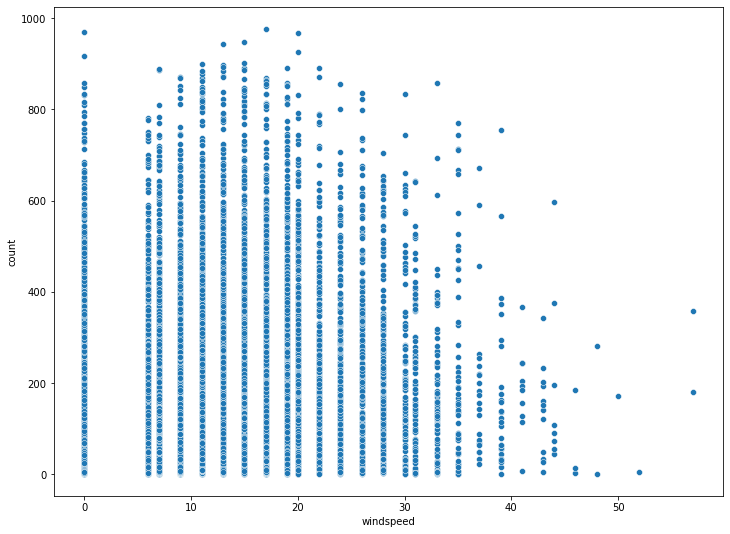

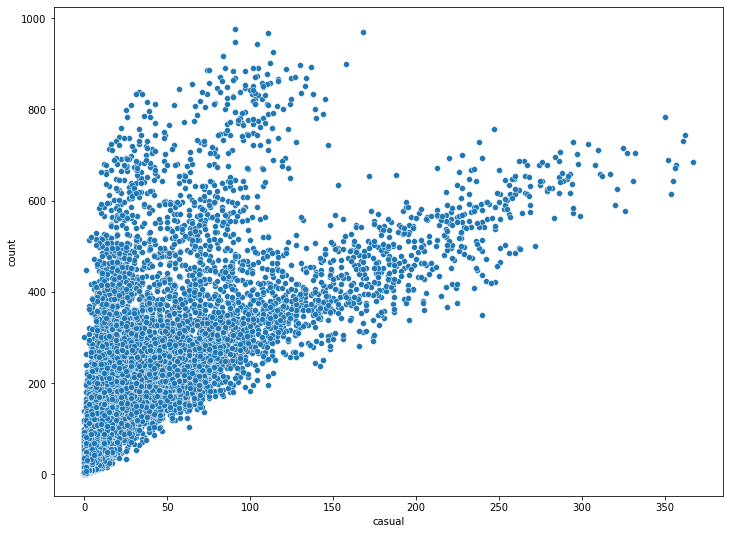

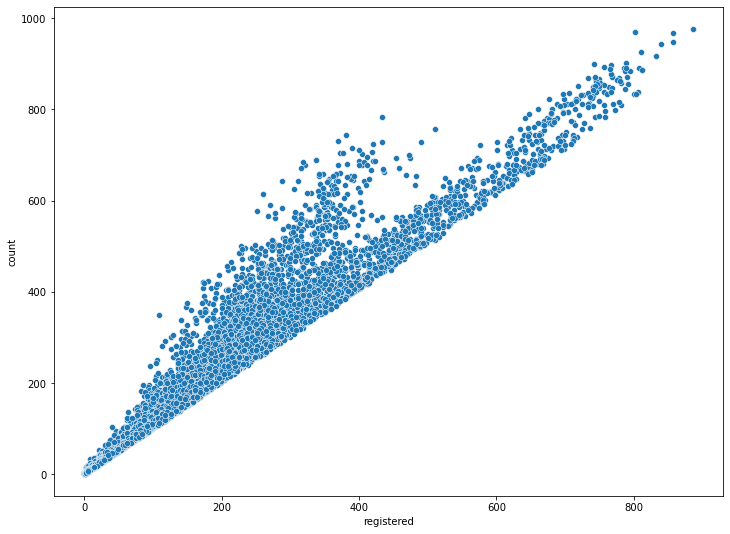

In [127]:
for column in df.iloc[:,:-1].columns:
    sns.scatterplot(x=column, y='count', data=df)
    plt.show()

In [128]:
def plot_grid(data, fig_size, grid_size, plot_type, target = ''):
    """
    Custom function for plotting grid of plots.
    It takes: DataFrame of data, size of a grid, type of plots, string name of target variable;
    And it outputs: grid of plots.
    """
    fig = plt.figure(figsize = fig_size)
    if plot_type == 'histplot':
        for i, column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.histplot(data[column_name], kde = True, color = 'royalblue', stat = 'count')
    if plot_type == 'boxplot':
        for i, column_name in enumerate(data.select_dtypes(exclude = 'object').columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.boxplot(x = data[column_name], color = 'royalblue')
    if plot_type == 'countplot':
        target = data[target]
        for i, column_name in enumerate(data.drop(target.name, axis = 1).columns):
            fig.add_subplot(grid_size[0], grid_size[1], i + 1)
            plot = sns.countplot(x = data[column_name], hue = target, palette = 'Blues_r')
            plot.legend(loc = 'upper right', title = target.name)
    plt.tight_layout()

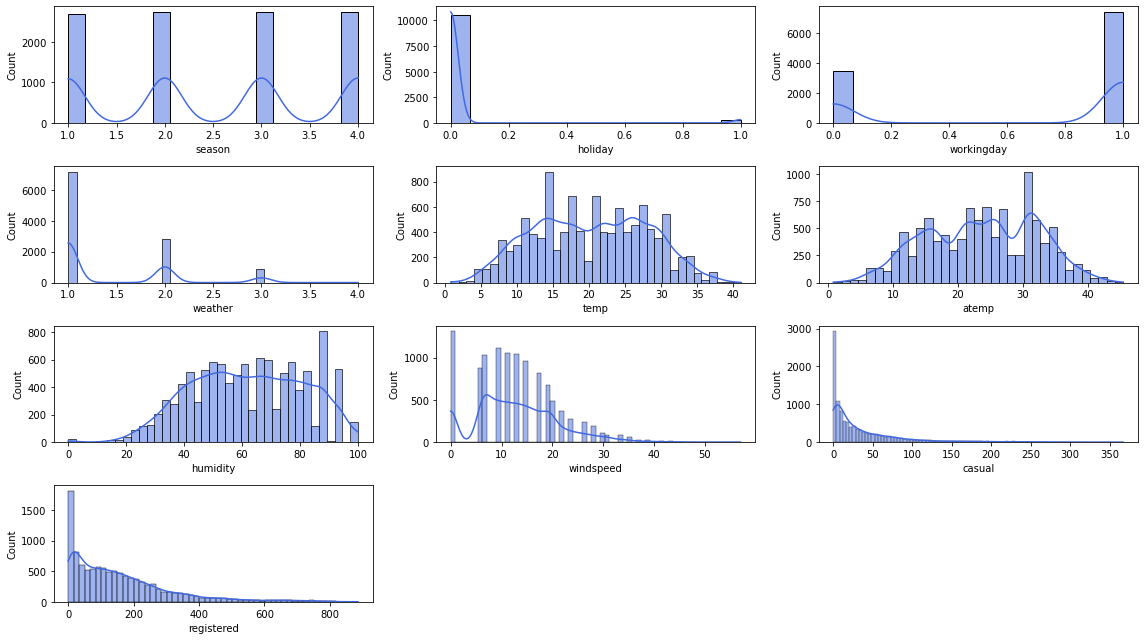

In [129]:
plot_grid(df.drop('count', axis = 1), (16, 9), (4,3), 'histplot')

In [130]:
# Look at the pairplot
# sns.pairplot(data=X)

In [131]:
df.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [132]:
#df.loc[:,'year'] = df.index.year

In [133]:
df['year'] = df.index.year

In [134]:
df['month'] = df.index.month

In [135]:
# df['week'] = df.index.week

In [136]:
# df['day'] = df.index.day

In [137]:
df['day_name']=df.index.day_name()

In [138]:
# binning daytime
#    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#    for i in range(7):
#        df[days[i]] = (df.index.dayofweek == i).astype(float)

In [139]:
df.loc[:,'hour'] = df.index.hour

In [140]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_name,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21


In [141]:
# Build a ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import make_pipeline
pipeline1 = make_pipeline(
            PolynomialFeatures(degree=2, include_bias=False), 
            MinMaxScaler()
            )

preprocess = ColumnTransformer([
    # list of tuples, where each tuple is a transformation
    # [(name, transformer, columns),
    # (name, transformer, columns)
    # ]
    ('polynomial_features', pipeline1, ['windspeed','atemp','temp','humidity']),
    ('interaction',PolynomialFeatures(interaction_only=True, include_bias=False), [
                                'windspeed','atemp','humidity','year','workingday','month','hour','weather']),
    ('one_hot_encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'), ['hour','day_name','weather']),
    #('group_imputer', MinMaxScaler(), ['temp']),
    #('hour_split', KBinsDiscretizer(n_bins=12, encode='onehot-dense', strategy='quantile'),['hour']),
    ('do_nothing', 'passthrough', ['year','holiday','month']) 
])

In [142]:
df['holiday'].unique()

array([0, 1])

In [143]:
df['workingday'].unique()

array([0, 1])

In [144]:
# delete column: casual, registered
X = df.iloc[:,0:]
y = df['count']

In [145]:
#Train-Test Split
from sklearn.model_selection import train_test_split as tts

Xtrain, Xtest, ytrain, ytest = tts(X,y,train_size=0.9)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((9797, 15), (1089, 15), (9797,), (1089,))

In [146]:
# Equivalent to first fitting and then transformin
preprocess.fit_transform(X)

array([[0.00000000e+00, 3.05067681e-01, 2.24489796e-01, ...,
        2.01100000e+03, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.88063542e-01, 2.04081633e-01, ...,
        2.01100000e+03, 0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 2.88063542e-01, 2.04081633e-01, ...,
        2.01100000e+03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [2.63195016e-01, 3.38964090e-01, 3.26530612e-01, ...,
        2.01200000e+03, 0.00000000e+00, 1.20000000e+01],
       [1.05325026e-01, 3.72860499e-01, 3.26530612e-01, ...,
        2.01200000e+03, 0.00000000e+00, 1.20000000e+01],
       [1.57869989e-01, 3.55856360e-01, 3.06122449e-01, ...,
        2.01200000e+03, 0.00000000e+00, 1.20000000e+01]])

In [147]:
# Does the ColumnTransformer produce column names
pd.DataFrame(preprocess.transform(X)).head()

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,0.0,0.305068,0.224490,0.81,0.0,0.0,0.0,0.0,0.100039,0.078851,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,0.0,1.0
1,0.0,0.288064,0.204082,0.80,0.0,0.0,0.0,0.0,0.089726,0.068418,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,0.0,1.0
2,0.0,0.288064,0.204082,0.80,0.0,0.0,0.0,0.0,0.089726,0.068418,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,0.0,1.0
3,0.0,0.305068,0.224490,0.75,0.0,0.0,0.0,0.0,0.100039,0.078851,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,0.0,1.0
4,0.0,0.305068,0.224490,0.75,0.0,0.0,0.0,0.0,0.100039,0.078851,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2011.0,0.0,1.0


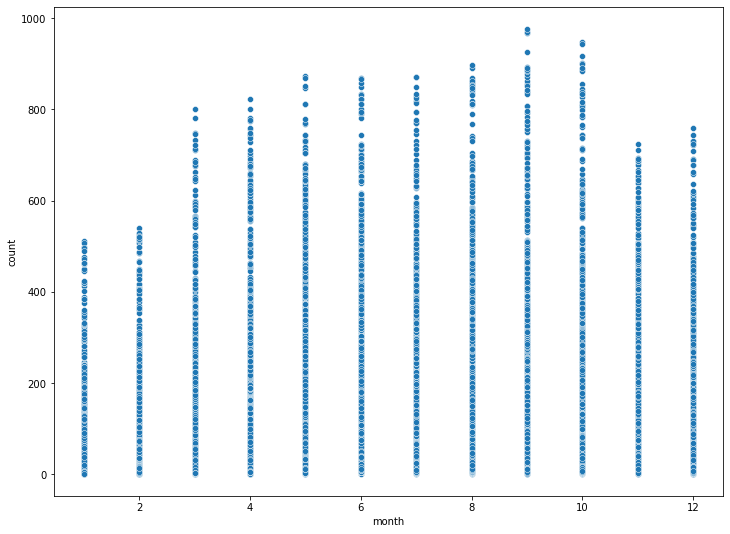

In [148]:
sns.scatterplot(x='month', y='count', data=df)

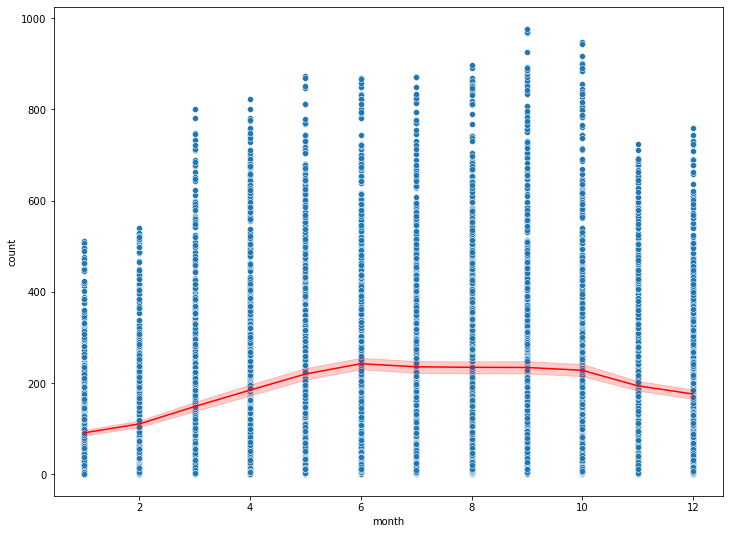

In [149]:
# violinplot() function 
# to edit: check https://www.python-graph-gallery.com/violin-plot/
sns.scatterplot(x=df["month"], y=df["count"])
sns.lineplot(x=df["month"], y=df["count"], color='r')

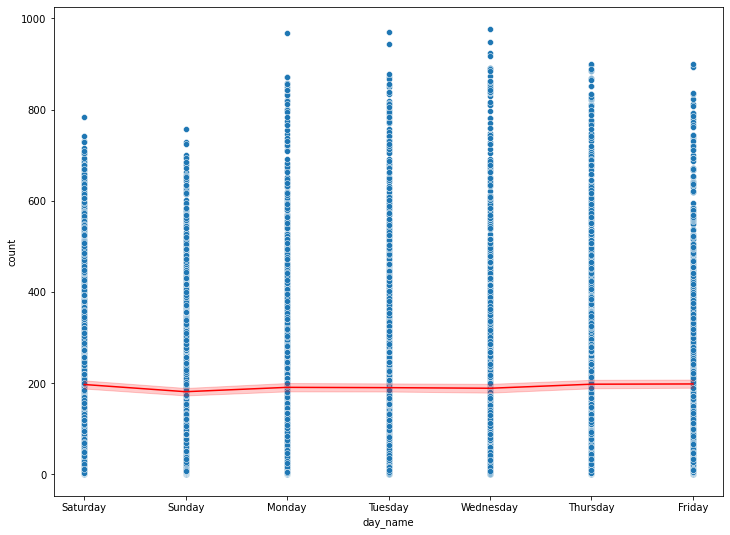

In [150]:
sns.scatterplot(x='day_name', y='count', data=df)
sns.lineplot(x='day_name', y='count', data=df, color='r')

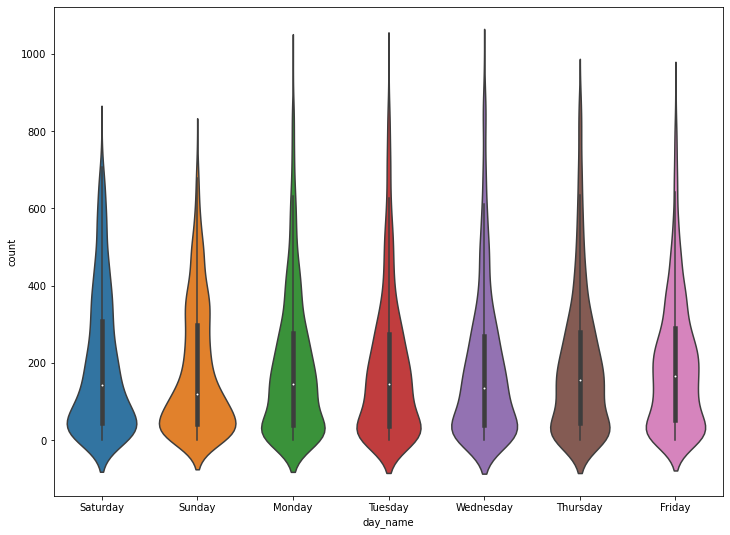

In [151]:
sns.violinplot(x=df["day_name"], y=df["count"])
# sns.lineplot(x='day_name', y='count', data=df, color='r')

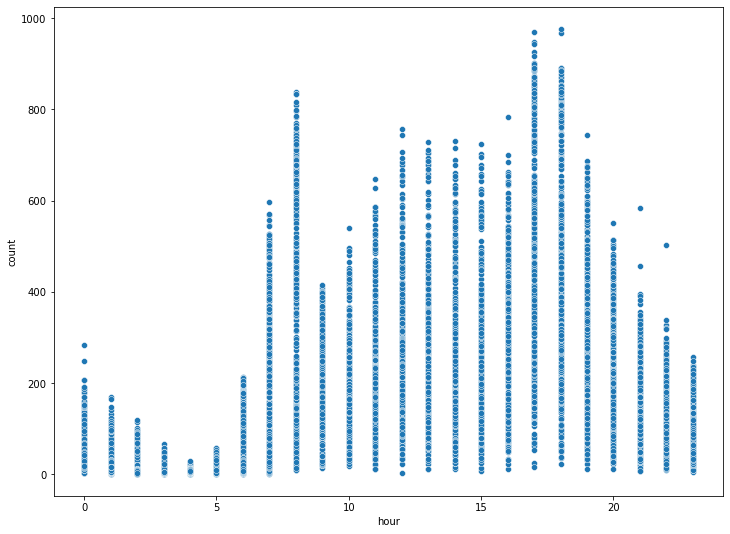

In [152]:
sns.scatterplot(x='hour', y='count', data=df)

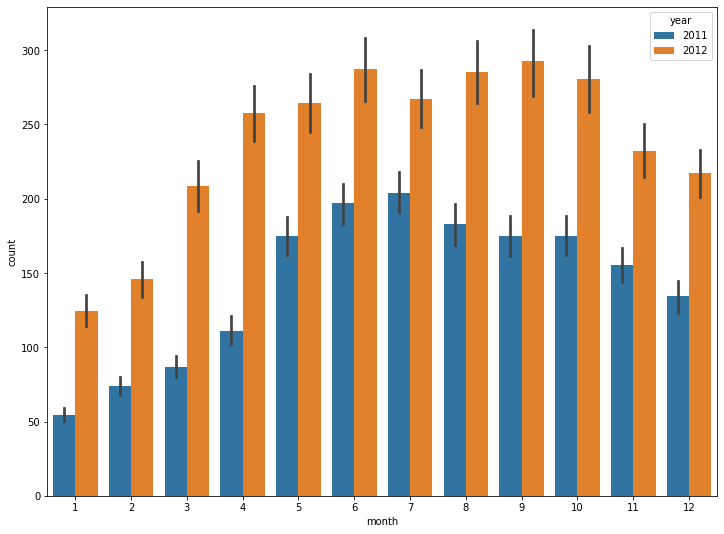

In [153]:
sns.barplot(x=df["month"], y=df["count"], hue=df["year"])


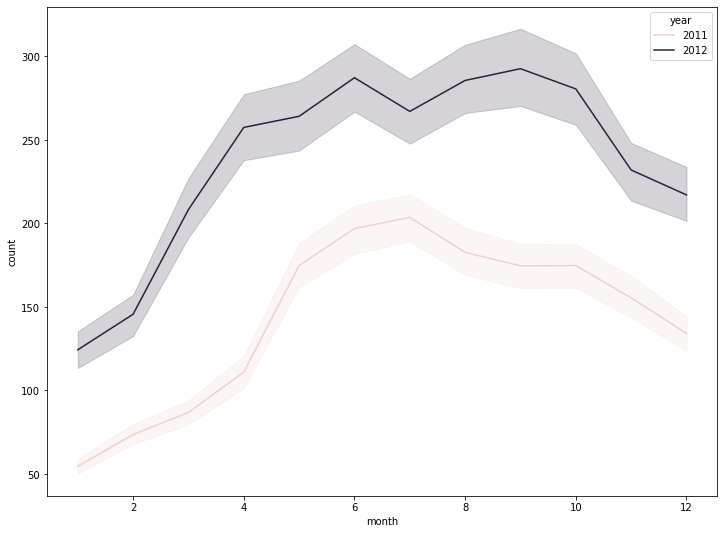

In [154]:
sns.lineplot(x=df["month"], y=df["count"], hue=df["year"])

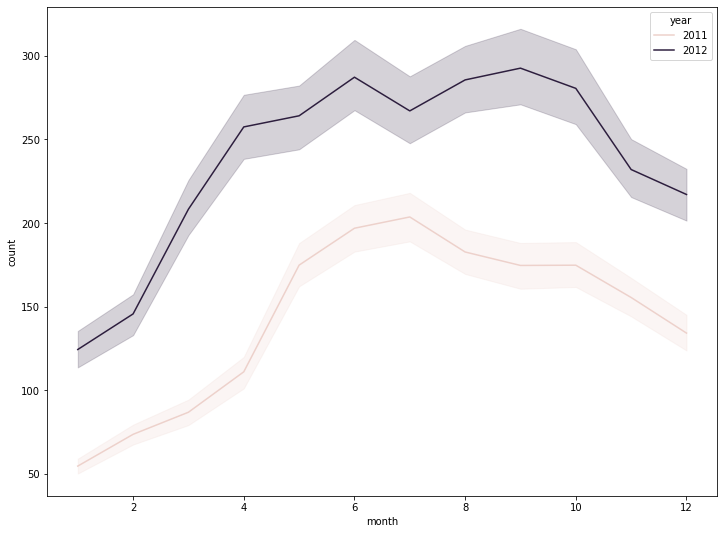

In [155]:
#Grouped violinplots
# sns.violinplot(x=df["month"], y=df["count"])
sns.lineplot(x=df["month"], y=df["count"], hue=df["year"])

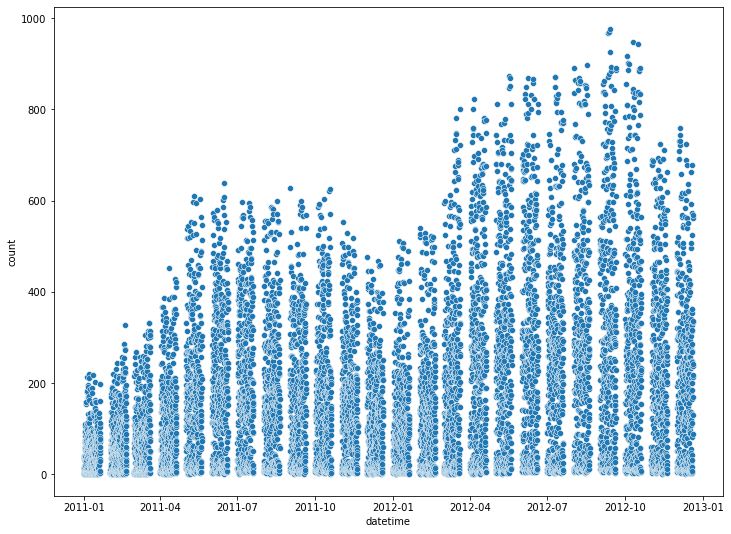

In [156]:
sns.scatterplot(x='datetime', y='count', data=df)

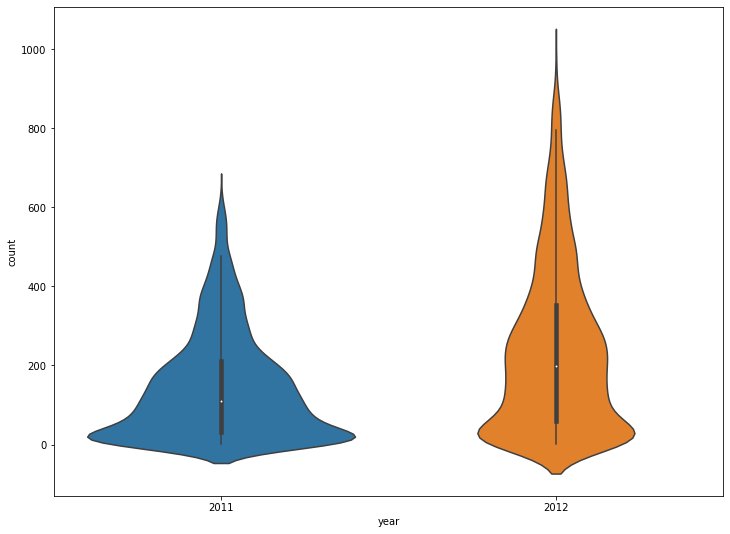

In [157]:
sns.violinplot(x='year', y='count', data=df)

In [158]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day_name,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,Saturday,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,Saturday,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,Saturday,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,Saturday,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,Wednesday,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,Wednesday,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,Wednesday,21


## Feature Engineer

In [159]:
# X_train, y_train = feature_engineering(df)

In [160]:
# Decide which feature to use
# Xtrain = df.iloc[:,:8]
column_names = ['weather','temp','workingday','atemp', 'humidity','windspeed','day_name','holiday','season',
            'hour','year','month']
Xtrain = X[column_names]
ytrain=df['count']

In [161]:
Xtrain_transformed = preprocess.fit_transform(Xtrain)

## Train a model / multiple models

In [162]:
m = LinearRegression()
m.fit(Xtrain_transformed,ytrain)

LinearRegression()

In [163]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
# m = LinearRegression() 
m_ridge = Ridge(alpha=0.2)  
m_lasso = Lasso(alpha=0.5)
m_elastic = ElasticNet(alpha=0.1, l1_ratio=0.2)

# m.fit(X_poly, y)       
m_ridge.fit(Xtrain_transformed,ytrain)  
m_lasso.fit(Xtrain_transformed,ytrain)  
m_elastic.fit(Xtrain_transformed,ytrain)

ypred = m.predict(Xtrain_transformed)
ypred_ridge = m_ridge.predict(Xtrain_transformed)
ypred_lasso = m_lasso.predict(Xtrain_transformed)
ypred_elastic = m_elastic.predict(Xtrain_transformed)

/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59518012.40300026, tolerance: 35717.291367554666
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85770649.31577998, tolerance: 35717.291367554666
  model = cd_fast.enet_coordinate_descent(


## Model evaluation / model selection - Cross-Validation

In [164]:
#Evaluate/Optimize the model
from sklearn.model_selection import cross_validate

cross_validation = cross_validate(m,
              Xtrain_transformed,
              ytrain,
              cv=10,
              return_train_score=True)

In [165]:
# m
cross_validation['train_score'].mean()

0.7407574432232877

In [166]:
cross_validation['test_score'].mean()

0.45910703610712866

In [167]:
m.score(Xtrain_transformed, ytrain)

0.7398689365191058

In [168]:
# ridge
m_ridge = Ridge(alpha=0.1)  
# m.fit(X_poly, y)       
m_ridge.fit(Xtrain_transformed,ytrain)  

from sklearn.model_selection import cross_validate

cross_validation_ridge = cross_validate(m_ridge,
              Xtrain_transformed,
              ytrain,
              cv=10,
              return_train_score=True)

# m_ridge
print('train_score, test_score:',cross_validation_ridge['train_score'].mean(), cross_validation_ridge['test_score'].mean()
     )
print('m.score:', m_ridge.score(Xtrain_transformed, ytrain))

train_score, test_score: 0.7360829559733945 0.4673074885074423
m.score: 0.7355368533772797


/home/guo/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-171-6b6bf5438d2b>:6: RuntimeWarning: overflow encountered in exp
  y_ = np.exp(y_)
<ipython-input-171-6b6bf5438d2b>:9: RuntimeWarning: overflow encountered in square
  calc = (log1 - log2) ** 2
/home/guo/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-171-6b6bf5438d2b>:9: RuntimeWarning: overflow encountered in square
  calc = (log1 - log2) ** 2
/home/guo/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-171-6b6bf5438d2b>:6: RuntimeWarning: overflow encountered in exp
  y_ = np.exp(y_)
<ipython-input-171-6b6bf5438d2b>:9: RuntimeWarning: overflow encou

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  inf


<ipython-input-171-6b6bf5438d2b>:9: RuntimeWarning: overflow encountered in square
  calc = (log1 - log2) ** 2


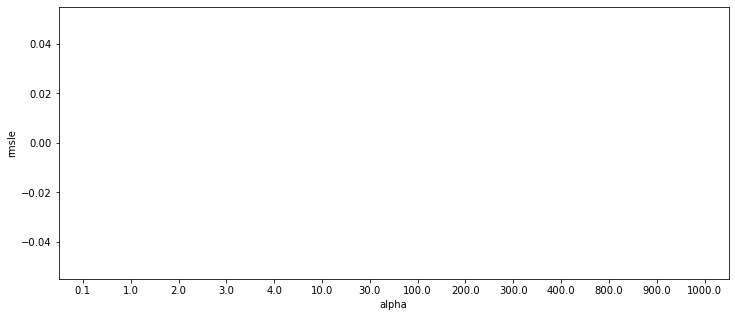

In [171]:
from sklearn import metrics

def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))



ridge_m_ = Ridge()
ridge_params_ = {'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)


yLabelsLog = np.log1p(ytrain)
grid_ridge_m.fit(Xtrain_transformed, ytrain)
preds = grid_ridge_m.predict(X= Xtrain_transformed)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df1 = pd.DataFrame(grid_ridge_m.cv_results_)
df1["alpha"] = df1["params"].apply(lambda x:x["alpha"])
df1["rmsle"] = df1["mean_test_score"].apply(lambda x:-x)
sns.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [170]:
# lasso
m_lasso = Lasso(alpha=0.1)
m_lasso.fit(Xtrain_transformed,ytrain)  

from sklearn.model_selection import cross_validate

cross_validation_lasso = cross_validate(m_lasso,
              Xtrain_transformed,
              ytrain,
              cv=10,
              return_train_score=True)

# m_lasso
print('train_score, test_score:',cross_validation_lasso['train_score'].mean(), cross_validation_lasso['test_score'].mean()
     )
print('m.score:', m_lasso.score(Xtrain_transformed, ytrain))

/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51524486.39746318, tolerance: 35717.291367554666
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47611571.0558405, tolerance: 33440.38322774319
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48190958.39882503, tolerance: 33715.94869284475
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:52

train_score, test_score: 0.7256510016404009 0.46216287926421307
m.score: 0.7245651143992378


/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45058510.437197536, tolerance: 31386.638864625438
  model = cd_fast.enet_coordinate_descent(


In [77]:
# m_elastic
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

m_elastic = ElasticNet(alpha=0.1, l1_ratio=0.2,max_iter = 100) 
m_elastic.fit(Xtrain_transformed,ytrain)

from sklearn.model_selection import cross_validate

cross_validation_elastic = cross_validate(m_elastic,
              Xtrain_transformed,
              ytrain,
              cv=10,
              return_train_score=True)

# m_lasso
print('train_score, test_score:',cross_validation_elastic['train_score'].mean(), cross_validation_elastic['test_score'].mean()
     )
print('m.score:', m_elastic.score(Xtrain_transformed, ytrain))

/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85825314.37614428, tolerance: 35717.291367554666
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83226264.64468654, tolerance: 33440.38322774319
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81232820.04893425, tolerance: 33715.94869284475
  model = cd_fast.enet_coordinate_descent(
/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:5

train_score, test_score: 0.5901595080060386 0.48100739269479276
m.score: 0.5895835911621471


/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73933079.6498227, tolerance: 31386.638864625438
  model = cd_fast.enet_coordinate_descent(


Go back to EDA and Feature Engineering part to improve your model and only once you are happy with the results go on!

## Test on unseen data

In [78]:
test = './data/test.csv'
df_test = pd.read_csv(test, parse_dates=True, index_col=0)

In [79]:
# Xtrain_transformed = preprocess.fit_transform(Xtrain)
df_test.index

DatetimeIndex(['2011-01-20 00:00:00', '2011-01-20 01:00:00',
               '2011-01-20 02:00:00', '2011-01-20 03:00:00',
               '2011-01-20 04:00:00', '2011-01-20 05:00:00',
               '2011-01-20 06:00:00', '2011-01-20 07:00:00',
               '2011-01-20 08:00:00', '2011-01-20 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=6493, freq=None)

In [80]:
df_test['year'] = df_test.index.year
df_test['month'] = df_test.index.month
df_test['day_name']=df_test.index.day_name()
df_test['hour'] = df_test.index.hour

In [81]:
X_testdata_transformed = preprocess.fit_transform(df_test)

In [82]:
# linear regression
ypred_test = m.predict(X_testdata_transformed)
ypred_test

array([ 43.64546926,   2.63786695, -11.87753567, ..., 207.83756702,
       174.16670546, 132.15853805])

In [83]:
# replace minus values with 0
import numpy as np
ypred_test= np.where(ypred_test < 0, 0, ypred_test)
ypred_test

array([ 43.64546926,   2.63786695,   0.        , ..., 207.83756702,
       174.16670546, 132.15853805])

In [ ]:
submission = pd.DataFrame(ypred_test, index=df_test.index, columns=['count'])
submission.to_csv('submission.csv')

In [1841]:
# ridge
ypred_m_ridge = m_ridge.predict(X_testdata_transformed)
ypred_m_ridge

array([ 26.06027936, -27.18485029, -40.56012668, ..., 193.537821  ,
       163.97516442, 119.70802496])

In [1842]:
import numpy as np
ypred_m_ridge= np.where(ypred_m_ridge < 0, 0, ypred_m_ridge)
ypred_m_ridge

array([ 26.06027936,   0.        ,   0.        , ..., 193.537821  ,
       163.97516442, 119.70802496])

In [1843]:
submission = pd.DataFrame(ypred_m_ridge, index=df_test.index, columns=['count'])
submission.to_csv('submission_ridge.csv')

In [1681]:
# prediction_to_csv(X_t,m)
# def prediction_to_csv(X_t,m):    

In [84]:
# random forest
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

rf = RandomForestRegressor(n_estimators=100,min_samples_split = 2) 
rf.fit(Xtrain_transformed,ytrain)  

ypred_test = rf.predict(X_testdata_transformed)


In [1846]:
from sklearn.model_selection import cross_validate

cross_validation_rf = cross_validate(rf,
              Xtrain_transformed,
              ytrain,
              cv=10,
              return_train_score=True)

# 
print('train_score, test_score:',cross_validation_rf['train_score'].mean(), cross_validation_rf['test_score'].mean()
     )
print('m.score:', rf.score(Xtrain_transformed, ytrain))

train_score, test_score: 0.9929497393111607 0.8006547224371034
m.score: 0.9931741347147073


In [91]:
# Grid search
from sklearn.model_selection import GridSearchCV

param_grid = {'random_state': [1],
              'n_estimators': [100,120,150],
              'max_depth' : [None],
              'max_features': [5,15,20],
              'min_samples_leaf': [1, 2],
              'min_samples_split' : [2,3]} 

rf_opti = RandomForestRegressor()
gridsearch = GridSearchCV(rf_opti, param_grid, verbose=True)
gridsearch.fit(Xtrain_transformed, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  7.6min finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None], 'max_features': [5, 15, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 120, 150], 'random_state': [1]},
             verbose=True)

In [94]:
gridsearch.best_params_, gridsearch.best_score_

({'max_depth': None,
  'max_features': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 150,
  'random_state': 1},
 0.7512607091091108)

In [95]:
results = pd.DataFrame(gridsearch.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.016886,0.013375,0.024473,0.000872,None,5,1,2,100,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.198986,0.802634,0.774160,0.769279,0.746453,0.658303,0.230353,27
1,1.254193,0.033147,0.031336,0.001390,None,5,1,2,120,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.202013,0.799752,0.780067,0.771325,0.745596,0.659751,0.229529,26
2,1.537072,0.006728,0.037420,0.001111,None,5,1,2,150,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.213135,0.798436,0.782107,0.774048,0.749677,0.663480,0.225722,25
3,0.953807,0.004983,0.022828,0.000792,None,5,1,3,100,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.164607,0.794605,0.775728,0.776295,0.743237,0.650894,0.243707,36
4,1.140898,0.004623,0.027896,0.001350,None,5,1,3,120,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.172160,0.791808,0.775810,0.772401,0.742325,0.650901,0.239905,35
5,1.427086,0.006928,0.035028,0.002186,None,5,1,3,150,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.187561,0.793539,0.778286,0.770906,0.744169,0.654892,0.234212,32
6,0.847424,0.003624,0.020894,0.000639,None,5,2,2,100,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.208820,0.801663,0.780992,0.754247,0.727458,0.654636,0.224303,33
7,1.021680,0.009707,0.025367,0.000761,None,5,2,2,120,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.217498,0.801250,0.779907,0.758603,0.729899,0.657432,0.221230,28
8,1.284649,0.016645,0.032487,0.000923,None,5,2,2,150,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.213640,0.798456,0.777520,0.760443,0.729064,0.655825,0.222257,30
9,0.859585,0.022453,0.021622,0.001756,None,5,2,3,100,1,"{'max_depth': None, 'max_features': 5, 'min_sa...",0.208820,0.801663,0.780992,0.754247,0.727458,0.654636,0.224303,33


In [96]:
rf_best = gridsearch.best_estimator_

In [97]:
ypred_test_rf = rf_best.predict(X_testdata_transformed)
ypred_test_rf

array([ 11.39584127,   5.33311111,   3.73980952, ..., 177.43967989,
       129.82974603,  84.32179894])

In [98]:
submission = pd.DataFrame(ypred_test_rf, index=df_test.index, columns=['count'])
submission.to_csv('submission_rf.csv')

In [92]:
#  Evaluating models and making a choice

def test_estimators(X, y, estimators, labels, cv):
    ''' 
    A function for testing multiple estimators.
    It takes: full train data and target, list of estimators, 
              list of labels or names of estimators,
              cross validation splitting strategy;
    And it returns: a DataFrame of table with results of tests
    '''
    result_table = pd.DataFrame()

    row_index = 0
    for est, label in zip(estimators, labels):

        est_name = label
        result_table.loc[row_index, 'Model Name'] = est_name

        cv_results = cross_validate(est,
                                    X,
                                    y,
                                    cv = cv,
                                    n_jobs = -1)

        result_table.loc[row_index, 'Test accuracy'] = cv_results['test_score'].mean()
        result_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        result_table.loc[row_index, 'Fit Time'] = cv_results['fit_time'].mean()

        row_index += 1

    result_table.sort_values(by=['Test accuracy'], ascending = False, inplace = True)

    return result_table

In [110]:
lr = LinearRegression()
m_ridge = Ridge(alpha=0.1) 

from sklearn.tree import  DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 1)

rf = RandomForestRegressor(random_state = 1)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(probability = True))

from sklearn.neighbors import KNeighborsRegressor
knn = make_pipeline(StandardScaler(), KNeighborsRegressor())


estimators = [lr,
              m_ridge,
              dt,
              rf,
              svc, 
              knn,]

labels = ['Log Regression',
          'm_ridge',
          'Decision Tree',
          'Random Forest',
          'SVC', 
          'KNN',]

results = test_estimators(Xtrain_transformed, ytrain, estimators, labels, cv = 10)
results.style.background_gradient(cmap = 'Blues')



/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


,Model Name,Test accuracy,Test Std,Fit Time
2,Random Forest,0.802104,0.134738,18.461128
1,Decision Tree,0.688634,0.168964,0.298472
4,KNN,0.467588,0.828467,0.373734
0,Log Regression,0.459107,0.543727,0.088326
3,SVC,0.021219,0.006704,228.178231


In [111]:
lr = LinearRegression()
m_ridge = Ridge(alpha=0.1) 

from sklearn.tree import  DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 1)

rf = RandomForestRegressor(random_state = 1)

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc = make_pipeline(StandardScaler(), SVC(probability = True))

from sklearn.neighbors import KNeighborsRegressor
knn = make_pipeline(StandardScaler(), KNeighborsRegressor())


estimators = [lr,
              m_ridge,
              dt,
              rf,
              svc, 
              knn,]

labels = ['Log Regression',
          'm_ridge',
          'Decision Tree',
          'Random Forest',
          'SVC', 
          'KNN',]

results = test_estimators(Xtrain_transformed, ytrain, estimators, labels, cv = 10)
results.style.background_gradient(cmap = 'Blues')

/home/guo/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


,Model Name,Test accuracy,Test Std,Fit Time
3,Random Forest,0.802104,0.134738,18.266781
2,Decision Tree,0.688634,0.168964,0.351718
5,KNN,0.467588,0.828467,0.390374
1,m_ridge,0.467307,0.611803,0.040107
0,Log Regression,0.459107,0.543727,0.091574
4,SVC,0.021219,0.006704,229.384030
